# 01- K-Nearest Neighbors

One of the applications of KNN algorithm is that we use it to classified the unknown data. Here we have a data file with hideen feature column names. Our task is to predict a class for a new data point.

## Import Libraries



In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data


We use index_col=0 to set the first column as index.

In [5]:
df_classified = pd.read_csv("Classified Data",index_col=0)

In [6]:
df_classified.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Standardize the Variables

We must standardize the variables since the KKN predicts the class of a given data point by calculating its distance to all other data points in the data set. So, any variables that are on a large scale will have a much larger effect on the distance and the result of the KNN algorithm. So we need to scale the features. 

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df_classified.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_features = scaler.transform(df_classified.drop('TARGET CLASS',axis=1))

In [11]:
df_classified_feat = pd.DataFrame(scaled_features,columns=df_classified.columns[:-1])
df_classified_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_classified['TARGET CLASS'],
                                                    test_size=0.30)

## Training KNN model

We train the model with K=1.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [17]:
predictions = knn.predict(X_test)

## Predictions and Evaluations

Since this problem is classification we should use classification report and confusion matrix to evaluate the model.

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(confusion_matrix(y_test,predictions))

[[136  18]
 [ 10 136]]


In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       154
           1       0.88      0.93      0.91       146

   micro avg       0.91      0.91      0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



## Choosing a K Value

Now we should determine what is the best value for K.

In [26]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test)) # calculates the average when prediction is not equal to y_test

Text(0, 0.5, 'Error Rate')

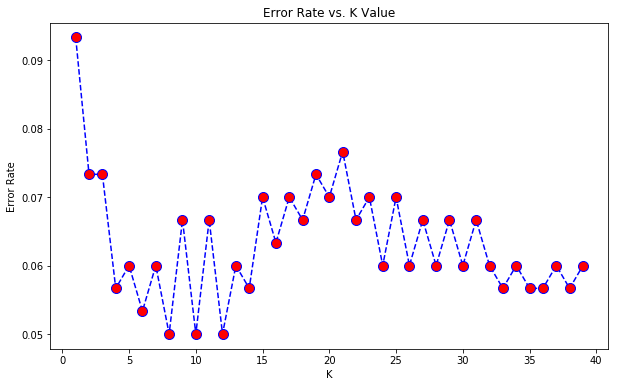

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>34 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [32]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

WITH K=1


[[136  18]
 [ 10 136]]


              precision    recall  f1-score   support

           0       0.93      0.88      0.91       154
           1       0.88      0.93      0.91       146

   micro avg       0.91      0.91      0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [33]:
# NOW WITH K=34
knn = KNeighborsClassifier(n_neighbors=34)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

WITH K=23


[[142  12]
 [  6 140]]


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       154
           1       0.92      0.96      0.94       146

   micro avg       0.94      0.94      0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Note that the best value for K is 10 due to the calculation of the error rate.